# Generador de gráficos para auditoría de gastos (ASF)

> Por: Jesús Octavio García Flores, octavio5545@ciencias.unam.mx, 2022

* Algunos datos han sido eliminados de este trabajo por cuestiones de privacidad.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import squarify 
import pandas as pd
import os

In [2]:
#pip install squarify

# TABLAS GENERALES

In [3]:
url_1 = "Ingresos totales 2020.xlsx"
url_2 = "destino 2020.xlsx"
url_3 = "Participaciones2020.xlsx"

In [4]:
# TABLA DE INGRESOS
df_ingresos = pd.DataFrame(pd.read_excel(url_1))
print(df_ingresos.shape)

(33, 14)


In [5]:
# TABLA DE PARTICIPACIONES
df_particip = pd.DataFrame(pd.read_excel(url_3))
print(df_particip.shape)
#df_particip

(33, 16)


In [6]:
# TABLA DE DESTINO
df_destino = pd.DataFrame(pd.read_excel(url_2))
print(df_destino.shape)
df_destino = df_destino.fillna(value=0)
#df_destino

(32, 29)


____________

## GRÁFICOS

In [7]:
color_palet = {'Encabezados': '#C4BDA3', 
               'Totales': '#91824D',
               'Beige1': '#A48A56', 
               'Beige2': '#B3A571',
               'Azul1': '#8D9CB1', 
               'Azul2': '#667A94',
               'Verde1': '#0C6B4D',
               'Verde2': '#569782',
               'Rojo1': '#9C2A29', 
               'Rojo2': '#B17253', 
               'Gris1': '#ABABAB', 
               'Gris2': '#D5D5D5', 
               'Gris3': '#B4B4B4'}
    
colores=[]
for color in color_palet:
    colores.append(color_palet[color])

In [8]:
######   TREEMAPS  POR ESTADO  #######


def graficos_treemaps(df_estado, colores=[], seed=25, save_plots=True, prefijo_plots=None):
    try:
        os.mkdir(prefijo_plots)
    except:
        None
    
    
# CREACIÓN DE LA TABLA CON MONTO Y PORCENTAJE
    def tabla_monto_porcentaje(df_estado):
        estado_2 = df_estado.T.loc[df_estado.columns[1]:]
        estado_2 = estado_2.reset_index()
        estado_2.columns = ['Fuente', 'Monto']
        estado_2.Monto = estado_2.Monto.astype(float)
        totales = estado_2.Monto[0]
        estado_2['Porcentaje'] = estado_2.Monto.apply(lambda x: str(np.round(x/totales*100, 1)) )
        estado_2.Porcentaje = estado_2.Porcentaje.astype(float)
        
        return estado_2
    

# CREACIÓN DE TABLA PARA EL GRÁFICO
    def tabla_estado_reducida(df_to_copy):
        df_to_fill = pd.DataFrame({'Fuente':[], 'Monto':[], 'Porcentaje':[]})
        otros = pd.DataFrame({'Fuente': 'Otros', 'Monto': [0], 'Porcentaje': [0]})
        suma_otros = df_to_copy[df_to_copy.Porcentaje < 1].sum()
        otros[['Monto', 'Porcentaje']] = [np.round(suma_otros[1], 1), np.round(suma_otros[2], 1)]
        df_to_fill = df_to_fill.append(df_to_copy[df_to_copy.Porcentaje > 1])
        df_to_fill = df_to_fill.append(otros)
        df_to_fill = df_to_fill.reset_index(drop=True)

        return df_to_fill
    
#ETIQUIETAS PARA LOS GRÁFICOS
    def etiquetas(estado_redu):
        labels_porcentajes = list(estado_redu.Porcentaje.apply(lambda x: str(x) + "%" ))       
        labels_montos      = list(estado_redu.Monto.apply(lambda x: "$ " + f'{x:,}' ))
        labels_montos_porcentajes = [str(w) +"\n" + str(x) + "\n" +str(y) for w,x,y in zip(estado_redu.Fuente, labels_montos, labels_porcentajes)]
        
        return labels_montos_porcentajes
    
#-------------------------------------------------------#     

# TREEMAPS

    def plot_treemaps(estado_redu, seed, colores, save_plots, prefijo_plots):
        np.random.seed(seed)
        colores_plot = np.random.choice(colores, size=len(estado_redu))

        # ETIQUETAS
        labels_ = etiquetas(estado_redu)
         
        # GRAFICOS CON PORCENTAJE
        plt.figure( figsize=(16,16) )
        sizes = estado_redu.Monto.loc[1:]
        squarify.plot(sizes=estado_redu.Monto.loc[1:],
                      color = colores_plot,
                      label = labels_[1:],
                      text_kwargs={'fontsize':22})

        
        plt.title("{} \n {} \n\n".format(prefijo_plots, df_estado[df_estado.columns[0]].iloc[0]), 
                  size=25)
        
        plt.xlabel("TEXTO BAJO EL TREEMAPS", size=22)
        
        plt.xticks(ticks=[0, 20, 40, 60, 80, 100], labels=[""]*6)
        plt.yticks(ticks=[0, 20, 40, 60, 80, 100], labels=[""]*6)
        
        if save_plots:
            plt.savefig("{}\{}_{}.jpg".format(prefijo_plots, prefijo_plots, df_estado[df_estado.columns[0]].iloc[0]), 
                    dpi=150, bbox_inches = 'tight')
        
                
        plt.show()
        
        print("\n\n")    



#-------------------------------------------------------#                    
        
        
    estado_monto_porcentaje = tabla_monto_porcentaje(df_estado)

    estado_redu = tabla_estado_reducida(estado_monto_porcentaje)
    #print(estado_redu)

    plot_treemaps(estado_redu, seed, colores, save_plots, prefijo_plots)
    

________________

# ---- INGRESOS ----

In [9]:
df_estado_ingresos = df_ingresos.iloc[0:32, 0:12].sort_values(by=df_ingresos.columns[1], ascending=False)
#df_estado_ingresos

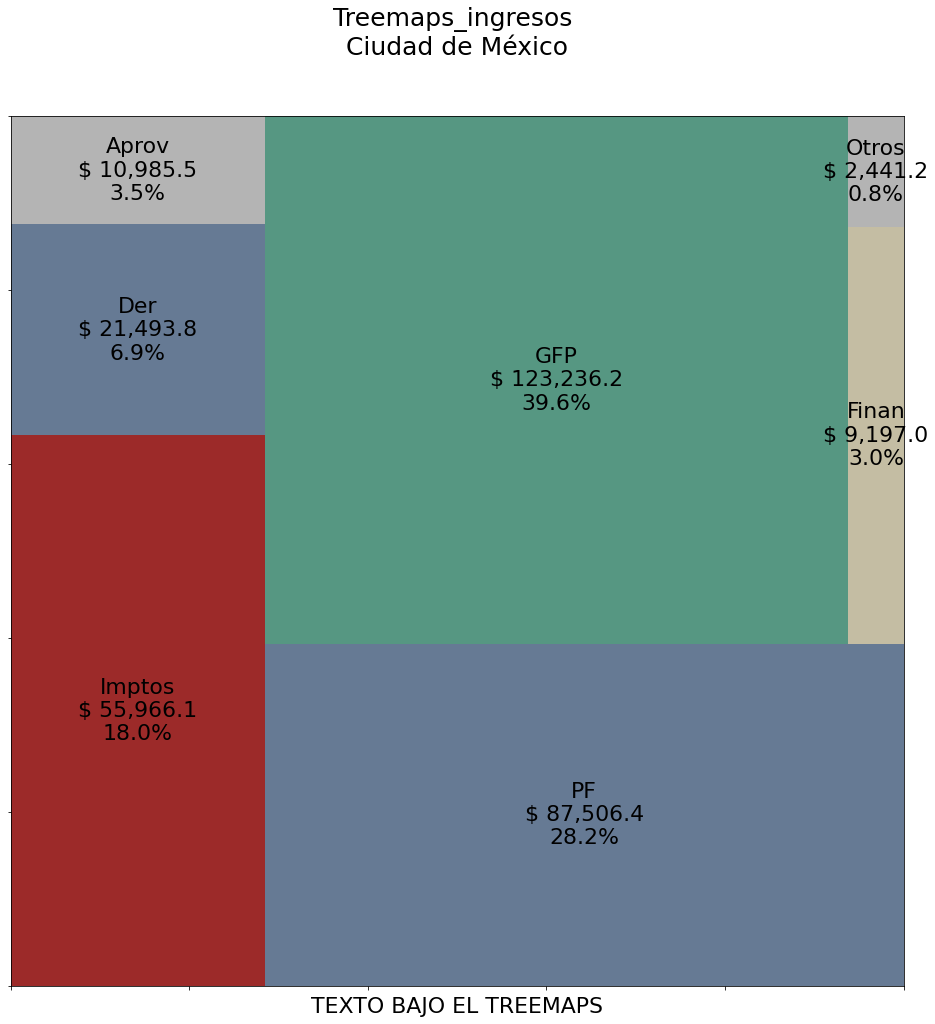

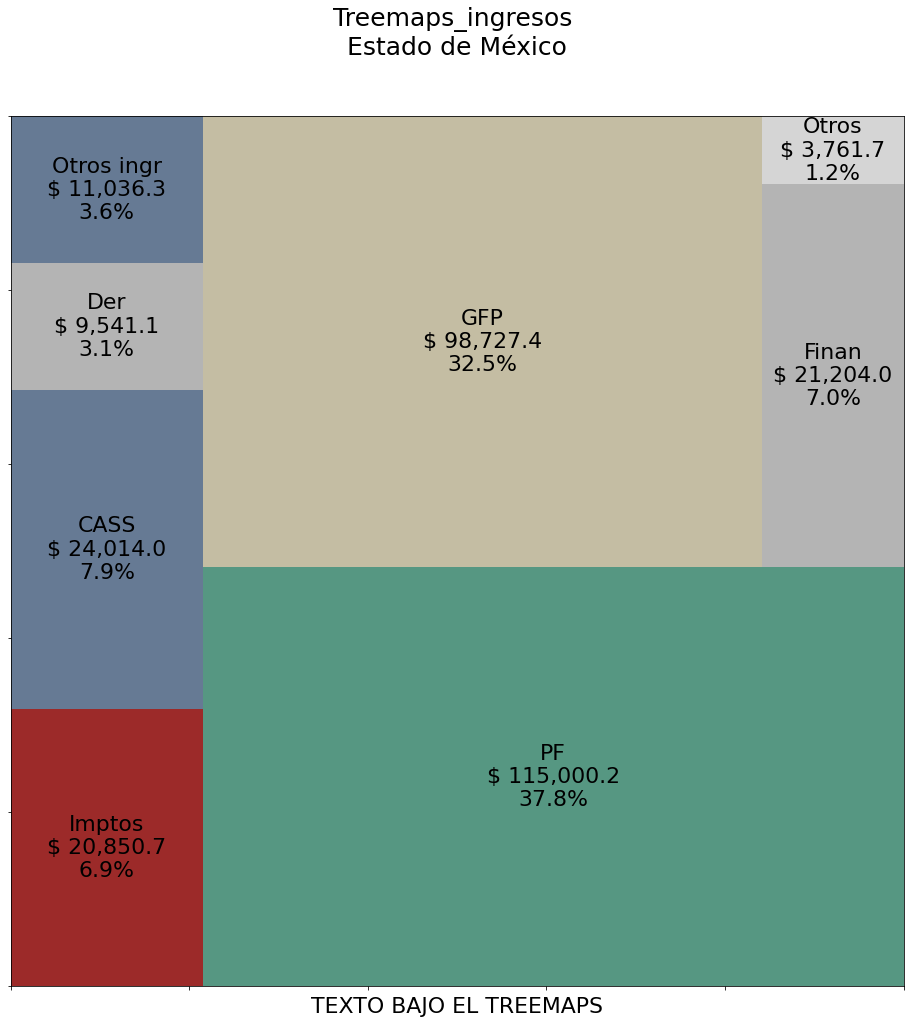

In [10]:
# GRAFICO DE TOTALES
#plot_totales(df_estado_ingresos, colores=colores, save_plot=True, prefijo_plots="Ingresos")


#TREEMAPS
i = 0
while i < 2: #32:
    graficos_treemaps(df_estado_ingresos.iloc[i:i+1, :], seed=15, colores=colores, prefijo_plots='Treemaps_ingresos')
    i += 1


________________

# ---- PARTICIPACIONES ----

In [11]:
df_estado_particip = df_particip.iloc[0:32, 0:15].sort_values(by=df_particip.columns[1], ascending=False)
#df_estado_particip

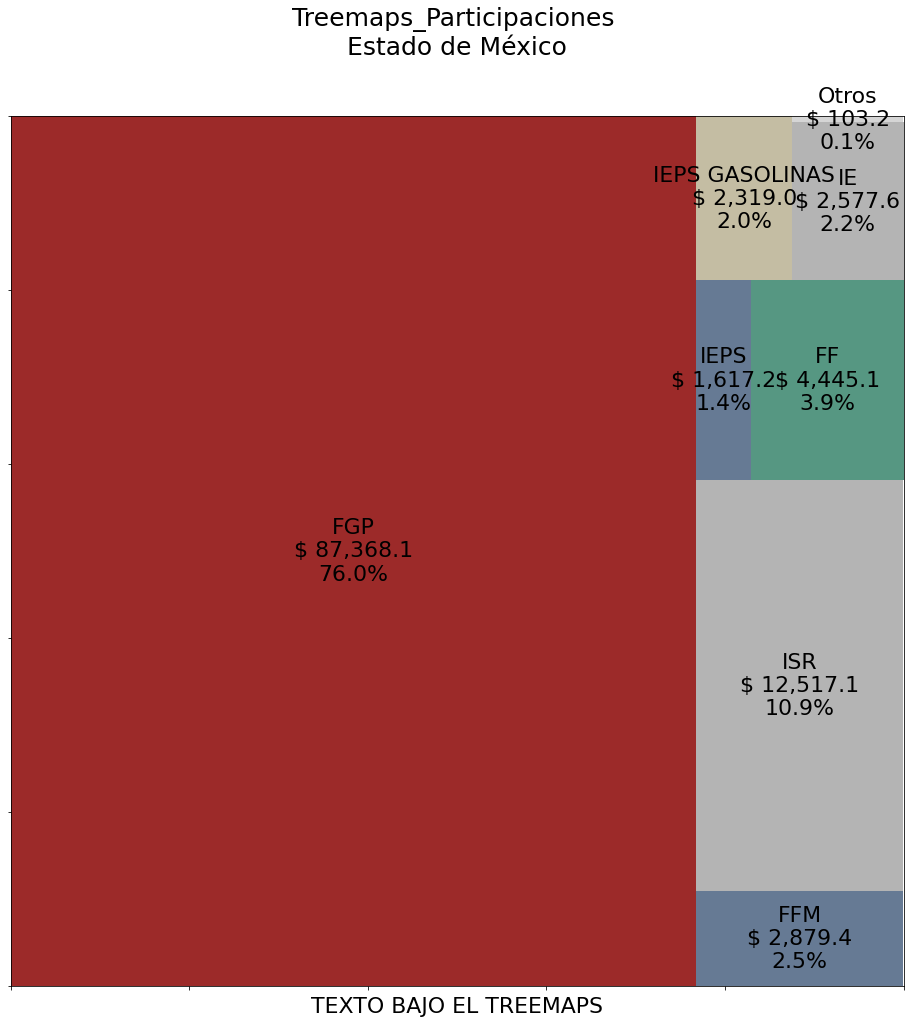

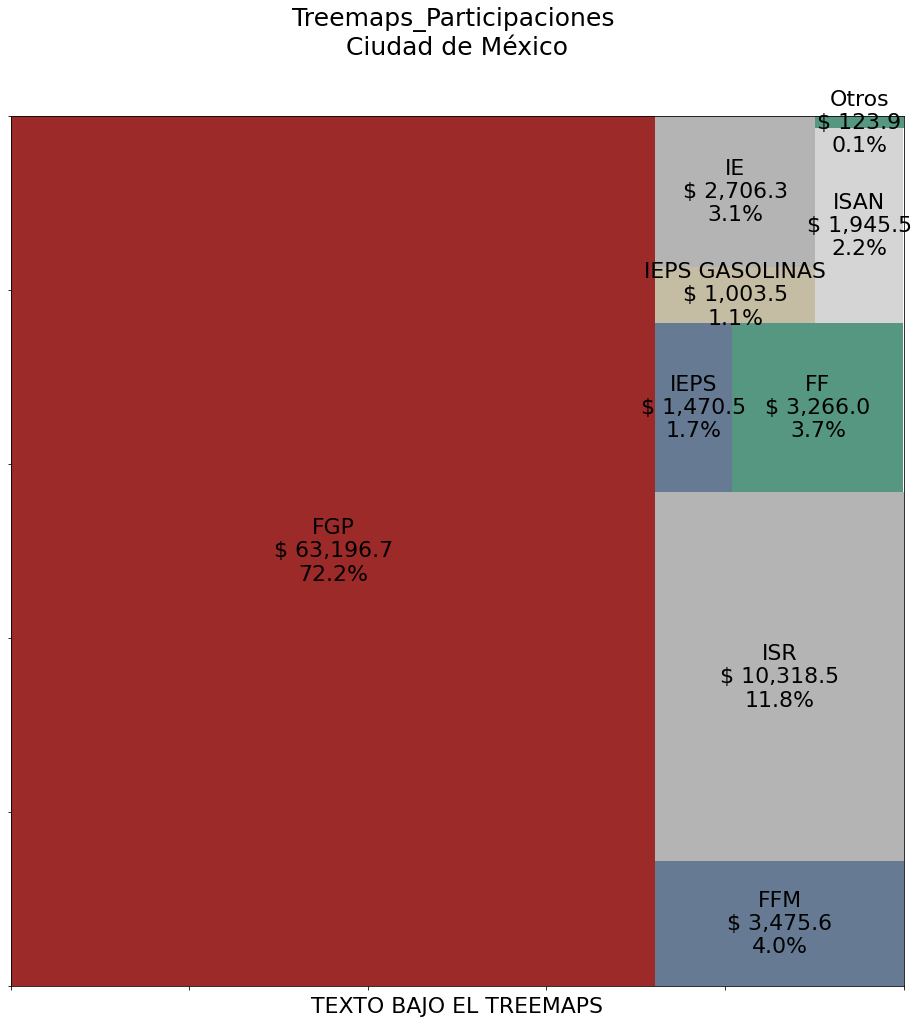

In [12]:
# TREEMAPS
i = 0
while i< 2: #32:
    graficos_treemaps(df_estado_particip.iloc[i:i+1, :], seed=15, colores=colores, prefijo_plots='Treemaps_Participaciones')
    i += 1
    

______________________

# ---- DESTINO ----

In [13]:
df_estado_destino = df_destino.iloc[0:32, 0:11].sort_values(by=df_destino.columns[1], ascending=False)
#df_estado_destino

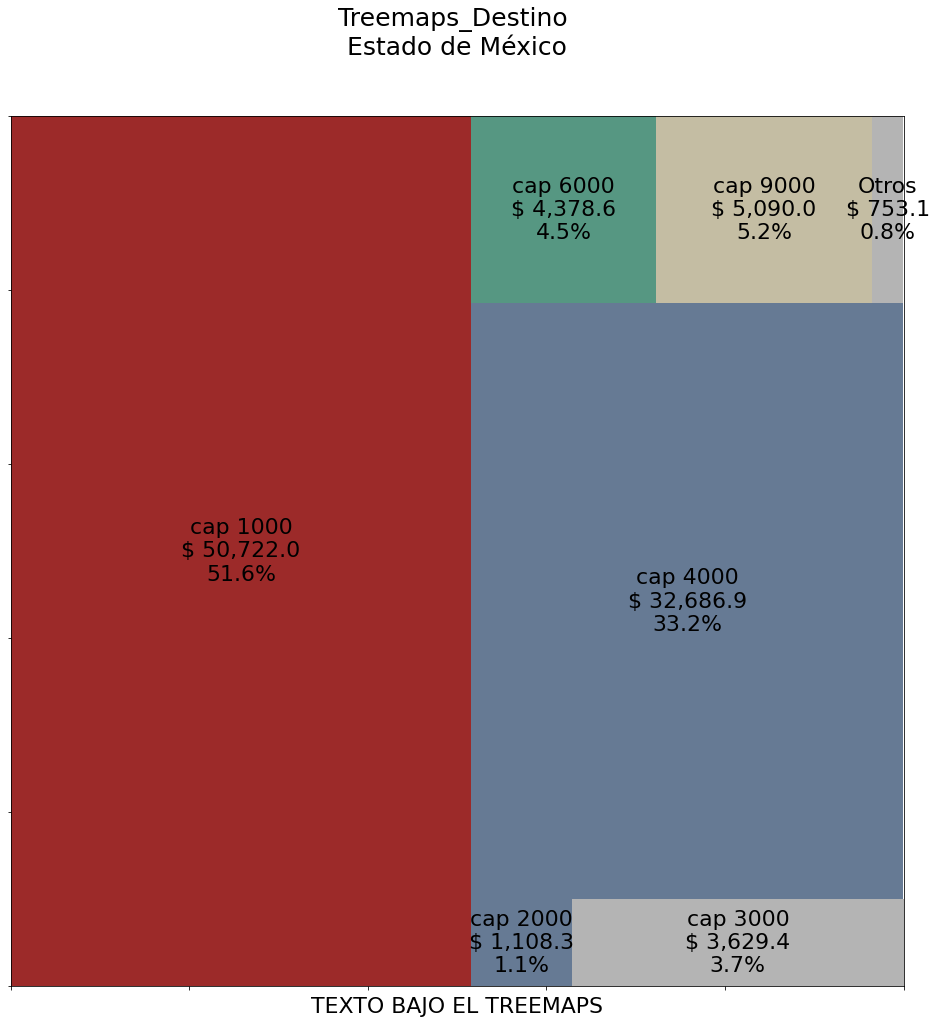

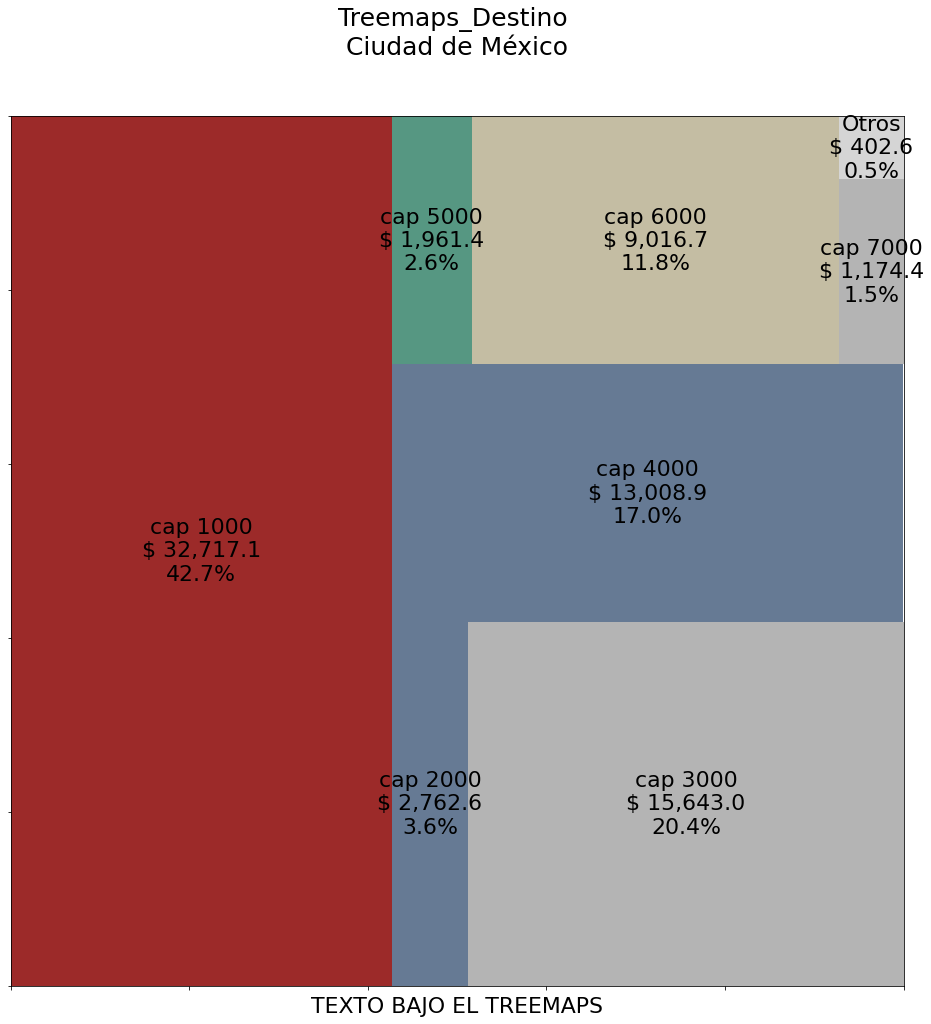

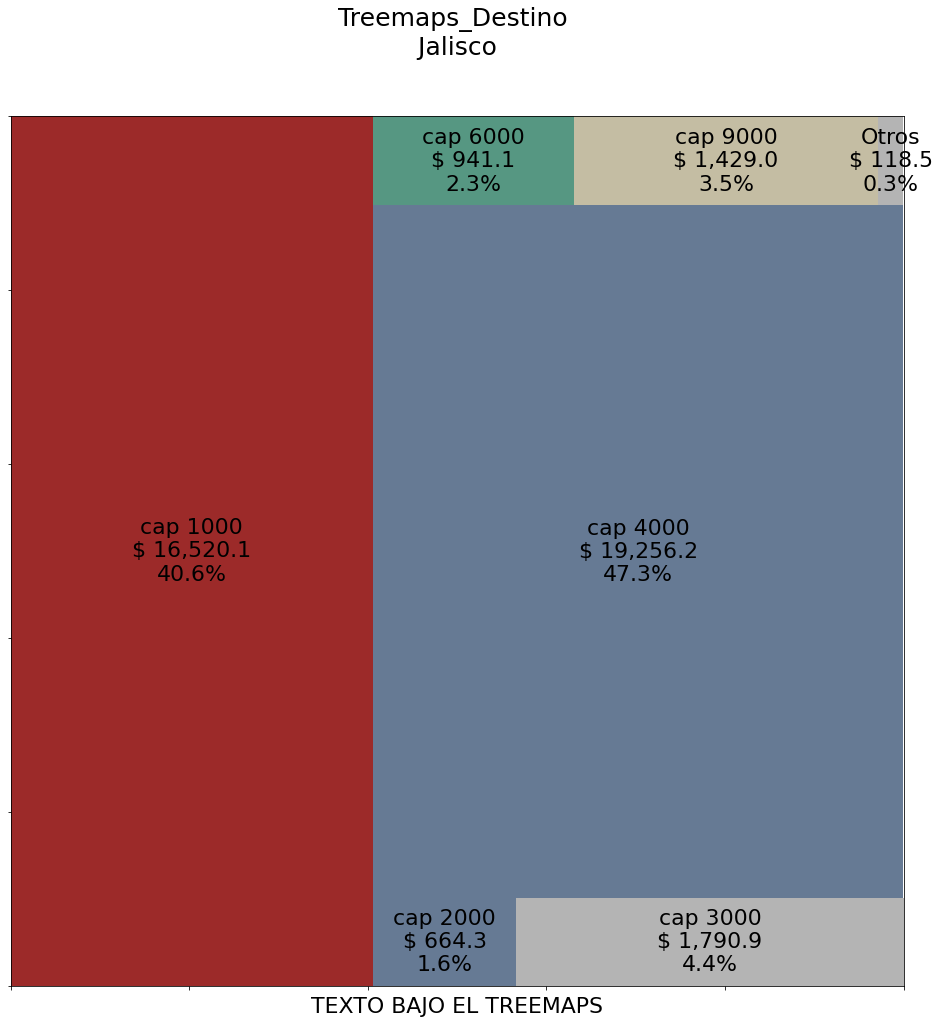

In [14]:
#TREEMAPS
i = 0
while i < 3: #32:
    graficos_treemaps(df_estado_destino.iloc[i:i+1, :], seed=15, colores=colores, prefijo_plots='Treemaps_Destino')
    i += 1
    